In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 定义RMSLE公式
def rmsle(y: np.ndarray, y_pred: np.ndarray):
    return np.sqrt(1 / len(y) * np.sum((np.log(1 + y_pred) - np.log(1 + y))**2))

In [6]:
file_path = 'kaggle/input/playground-series-s5e5'
train_df = pd.read_csv(os.path.join(file_path, "train.csv"))
test_df = pd.read_csv(os.path.join(file_path, "test.csv"))
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})
# # 检查空数据情况
# print("----Train data----")
# print(train_df.isnull().sum())
# print("----Test data----")
# print(test_df.isnull().sum())

# # 检查数据类型
# print("----Train data----")
# print(train_df.dtypes)

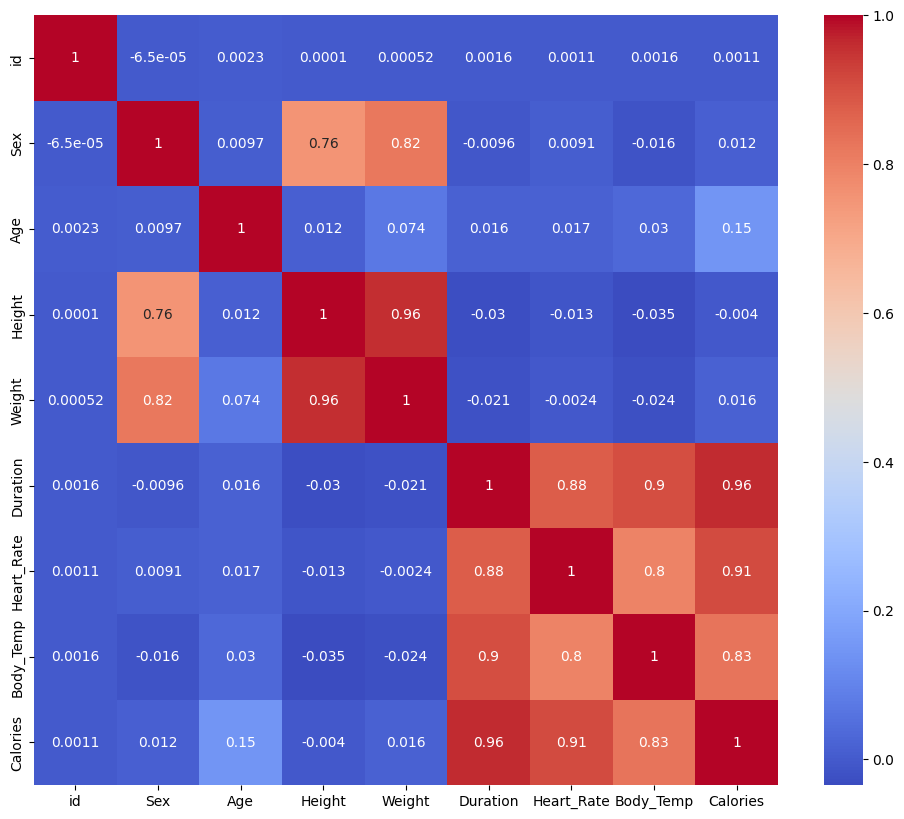

In [13]:
# 绘制相关性热图
# print(train_df.corr())

plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()


r-squared: 0.9599076133826583


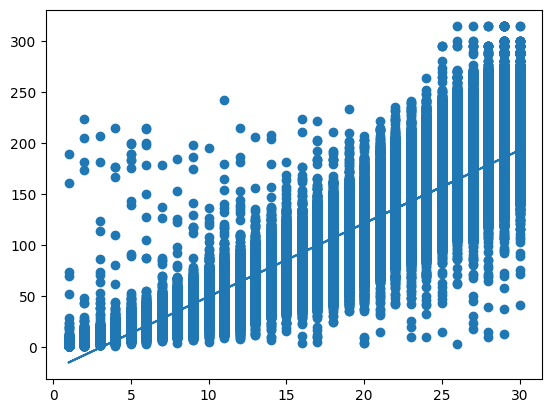

,Id,Calories
0,750000,27.909241
1,750001,121.111314
2,750002,92.433753
3,750003,121.111314
4,750004,92.433753


In [18]:
# using linear regression to fit the data
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(train_df['Duration'], train_df['Calories'])
print("r-squared:", r)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, train_df['Duration']))

plt.scatter(train_df['Duration'], train_df['Calories'])
plt.plot(train_df['Duration'], mymodel)
plt.show()

# calculate the result to the test data
test_result = list(map(myfunc, test_df['Duration']))
submission = pd.DataFrame({'Id': test_df['id'], 'Calories': test_result})
submission.to_csv('submission.csv', index=False)
submission.head()

